In [15]:
from aind_hcr_data_loader.hcr_dataset import (create_hcr_dataset, 
                                             create_hcr_dataset_from_config)
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import aind_hcr_qc.spectral_unmixing as su
import aind_hcr_qc.constants as constants
# notebook reload
%load_ext autoreload
%autoreload 2

data_dir = Path('/root/capsule/data')
bucket_name = "aind-open-data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
fennel_dataset = create_hcr_dataset_from_config("749315", data_dir=data_dir,config_path="/src/aind-hcr-data-loader/src/aind_hcr_data_loader/examples/mouse_config_example.json")
fennel_ophys_mfish_match_df = pd.read_csv("749315_matched_cells_coreg.csv")

Could not load metadata for mouse 749315


## Load all the spots for all rounds

In [ ]:
# 1) all spots
fennel_spots = fennel_dataset.load_all_rounds_spots(table_type='mixed_spots')

In [ ]:
# 2) coreg only
fennel_coreg_spots = fennel_dataset.load_all_rounds_spots_coreg(
                                      fennel_ophys_mfish_match_df,
                                      # mixed_spots or umixed_spots
                                      table_type='mixed_spots')

Loading mixed_spots for round R1: HCR_749315_2025-04-18_13-00-00_processed_2025-05-13_23-47-40
Loading mixed_spots for round R4: HCR_749315_2025-05-08_14-00-00_processed_2025-05-17_22-15-31
Loading mixed_spots for round R2: HCR_749315_2025-04-25_13-00-00_processed_2025-05-17_22-13-57
Loading mixed_spots for round R3: HCR_749315_2025-05-01_13-00-00_processed_2025-05-17_22-15-26
Loading mixed_spots for round R5: HCR_749315_2025-05-15_13-00-00_processed_2025-05-17_22-15-29





Number of mixed_spots: 60094747
Number of coregistered mixed spots: 2008399


# Check spot metrics

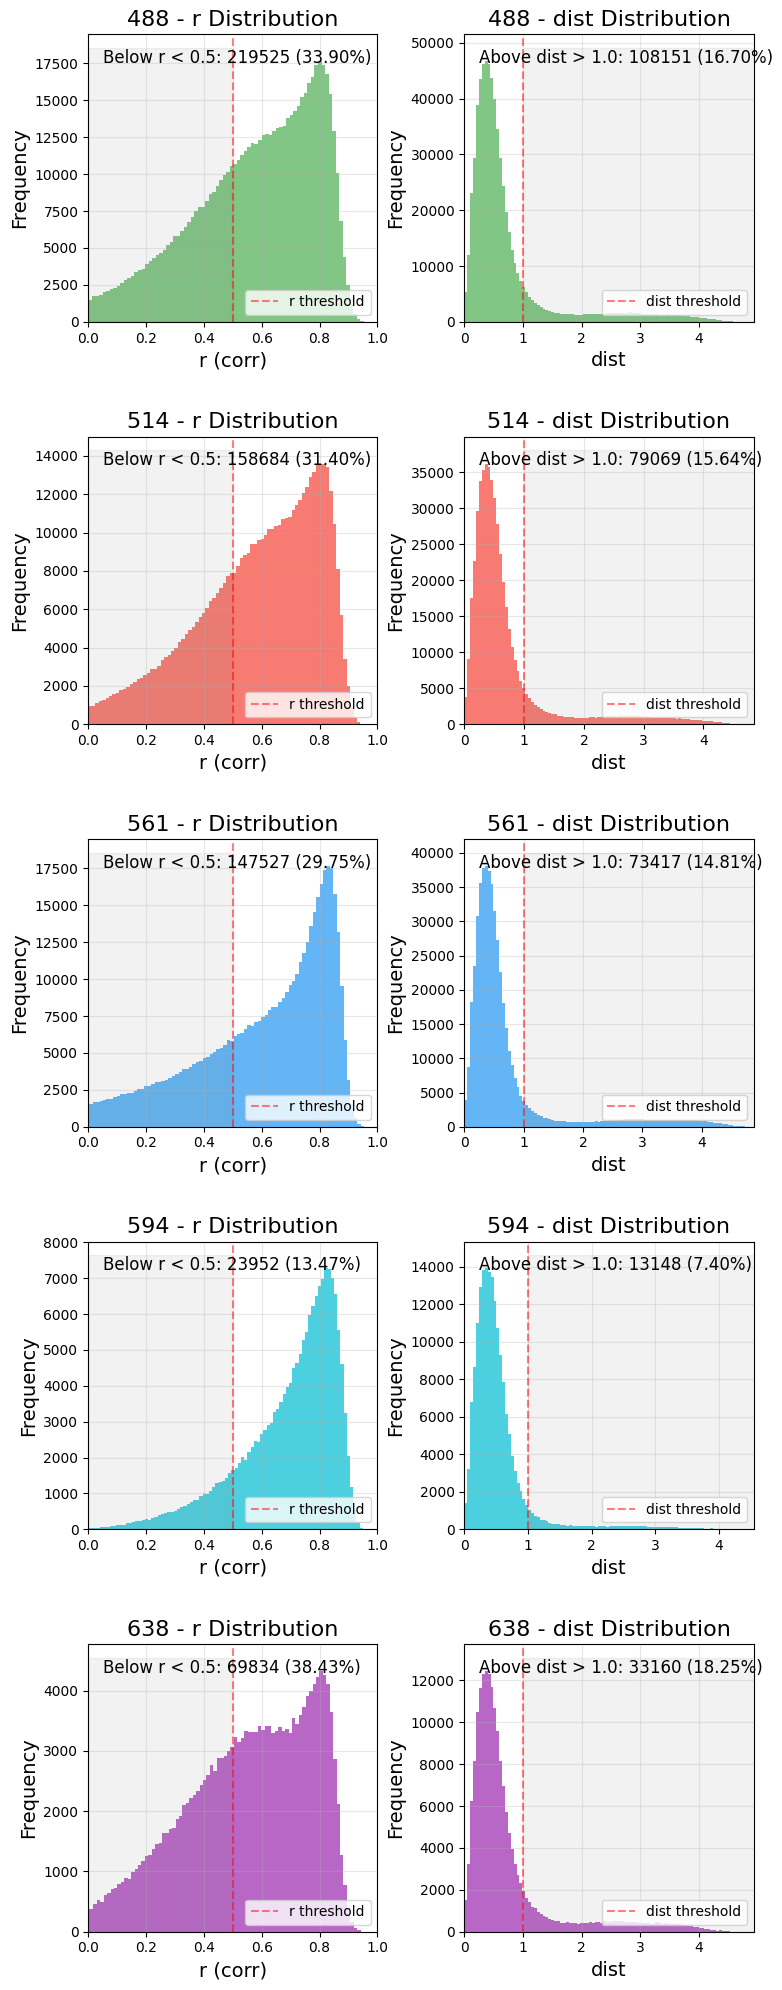

In [16]:
su.plot_spot_metric_dist(fennel_coreg_spots, 
                         constants.CHANNEL_COLORS)
plt.show()